# **Text Preprocessing for Spam Email Classification with KNN Pipeline** &#9749;


Spam emails continue to be a prevalent issue in today's digital world, posing risks such as phishing attacks, malware distribution, and unwanted solicitations. Developing effective spam email classifiers requires robust preprocessing of textual data to extract meaningful features and enhance the performance of machine learning models.

In this notebook, I'll focus on preprocessing textual data for spam email classification using a pipeline approach with K-Nearest Neighbors (KNN) algorithm. By implementing a comprehensive preprocessing pipeline, I aim to improve the accuracy and efficiency of our spam email classifier.

## Dataset

I'll be working with a [dataset](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset) containing a collection of emails labeled as either spam or non-spam (ham). This dataset serves as the basis for training and evaluating our spam email classifier.

## Objective

The primary objective of this project is to preprocess the text content of emails to extract relevant features and prepare the data for classification using the KNN algorithm. By incorporating various text preprocessing techniques, I aim to enhance the quality of features fed into the classifier, ultimately improving its performance in distinguishing between spam and non-spam emails.

## Methodology

My approach to text preprocessing for spam email classification involves the following steps:

1. **Data Loading**: I'll load the dataset containing email text and corresponding labels (spam or non-spam) into memory for preprocessing and model training.

2. **Text Cleaning**: I'll perform essential text cleaning tasks such as removing HTML tags, special characters, punctuation, and converting text to lowercase to standardize the text data.

3. **Tokenization**: I'll tokenize the cleaned text into individual words or tokens to facilitate further processing and feature extraction.

4. **Stopword Removal**: I'll eliminate common stopwords (e.g., "the," "and," "is") from the tokenized text, as they often carry little semantic meaning and can potentially introduce noise into the classification process.

5. **Stemming or Lemmatization**: I'll apply stemming or lemmatization to reduce words to their root forms, thereby reducing the dimensionality of the feature space and improving generalization.

6. **Feature Extraction using TDFIF**: I'll transform the preprocessed text data into numerical feature vectors using techniques such as TF-IDF (Term Frequency-Inverse Document Frequency), which assigns weights to terms based on their frequency and importance in the corpus.

7. **Model Training and Evaluation**: Finally, I'll construct a KNN pipeline that encapsulates the entire preprocessing workflow and train it on the preprocessed data. I'll evaluate the performance of the trained model using metrics such as accuracy, precision, recall, and F1-score on a held-out validation set.

By the end of this notebook, you'll have a thorough understanding of how to preprocess textual data for spam email classification using a KNN pipeline, laying the groundwork for building accurate and effective spam email classifiers.

Let's get started!

# Import Libraries

I will import the necessary libraries:

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import sklearn

# Read Data

Reading the dataset and setting the encoding to latin-1:

In [151]:
df = pd.read_csv("spam.csv", encoding='latin-1') #Set the encoding to latin-1 to prevent a UnicodeDecodeError

#Exploratory Data Analysis
In order to conduct text processing, data has to be explored and cleaned extensively. As part of EDA, I will:

1. Check Null Values
2. Check Datatypes
3. Check the Shape of the Dataset
4. Check the Distribution of the Dataset



Let's see how the data looks:

In [152]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


The data has three columns with null values. I will have to remove those columns using .drop() method:

## Checking Null Values
Let's verify the presence of null values using `isnull()`

In [153]:
df.isnull().any()

v1            False
v2            False
Unnamed: 2     True
Unnamed: 3     True
Unnamed: 4     True
dtype: bool

Columns v1 and v2 have no null values.

## Checking Data Types



In [154]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

The target column, v1 is of object type. It will have to be of the numerical type in order to perform calculations. Thus, it will have to be converted to numerical data.

## Shape of Data Set

In [155]:
df.shape

(5572, 5)

There are 5572 instances and 5 columns.

## Checking Distribution of the Data

I will check to see if whether the target column is imbalanced or not using a barplot

<Axes: xlabel='v1', ylabel='count'>

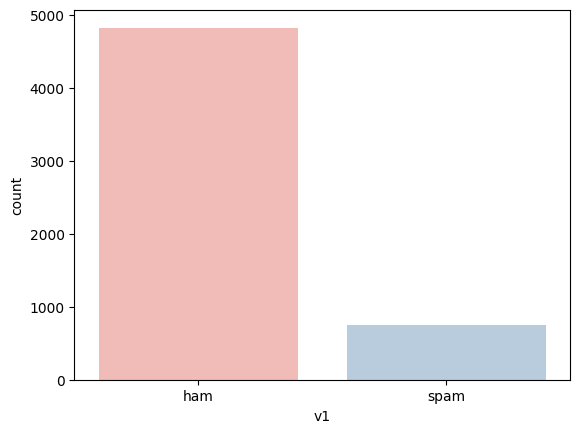

In [156]:
sns.countplot(x='v1', data=df, palette='Pastel1') #Checking the distribution using a CountPlot.

There is a higher number of ham messages compared to spam messages. Thus the data is imbalanced and I'll have to use `SMOTE()`.

## Visualizing the Data

### Word length

I will visualize the word length of spam words vs ham words. I will do this using a kdeplot.

In [157]:
df['length'] = df['v2'].apply(len)


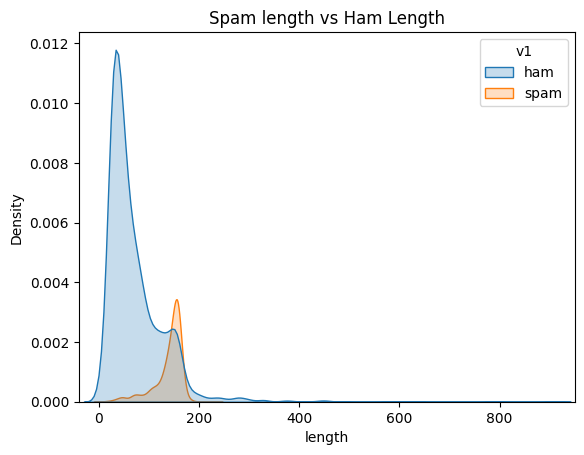

In [188]:
sns.kdeplot(x=df['length'],hue=df['v1'], fill=True);
plt.title("Spam length vs Ham Length")
plt.xlim(-40,950);

Spam words have a lower word length compared to ham words.

# Preprocessing
As part of preprocessing, I will:
1. Drop the columns with null values
2. Convert the target column to a numerical type

## Dropping Null Columns
I will drop the three columns with the null values.

In [159]:
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)

## Converting Labels to Numerical Data
I will be encoding 'spam' as 1 and 'ham' as 0.

In [160]:
#Encoding 's
df['spam'] = df['v1'].map( {'spam': 1, 'ham': 0} ).astype(int)

Let's see how the cleaned dataset looks:

In [161]:
df.head()

,v1,v2,length,spam
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0


- The 3 null columns have been dropped
- A new numerical column 'spam' has been created from 'v1'

# Text Processing
As part of text preprocessing, I will conduct:
1. Removal of stop words
2. Tokenization
3. Stemming
4. Lemmatization
5. Vectorization with TFIDF
6. Dirichlet Allocation
7. Visualization


## Remove Stop Words

Stopwords are generally filler words, which add little meaning to a sentence. Removing stop words is important for the easy processing of the text data by reducing the size of data.To remove stopwords, I'll use the NLTK package.

I will have to first install NLTK. Installing the NLTK package...

In [162]:
pip install --user -U nltk

I will use NLTK to remove stopwords from the text column, 'v2'. This will create a new column, called ['without-stopwords'].

In [163]:
from nltk.corpus import stopwords #Importing NLTK and Stopwords
nltk.download("stopwords") #Downloading stopwords from NLTK
stop = stopwords.words('english') #Downloading stopwords in English
df['without_stopwords'] = df['v2'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) #https://stackoverflow.com/a/61987561/21417138


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The resulting column without stopwords:

In [164]:
df[['without_stopwords']].head() #Displaying data without stopwords

,without_stopwords
0,"Go jurong point, crazy.. Available bugis n gre..."
1,Ok lar... Joking wif u oni...
2,Free entry 2 wkly comp win FA Cup final tkts 2...
3,U dun say early hor... U c already say...
4,"Nah I think goes usf, lives around though"


## Tokenization

Tokenization is the breaking up of a phrase, sentence or paragraph into smaller units such as individual words (called tokens), that a program can easily work with. Without tokenization, it's impossible to carry out analysis of text data.

I will apply tokenization to the column from which the stopwords were removed, ['without_stopwords']. To do this, I will use Punkt and NLTK's word_tokenize.
- Punkt divides text into a list of sentences.
- word_tokenize is a function for splitting strings into tokens

Applying Tokenization will result in a new tokenized column, ['tokenized_text].

In [165]:
nltk.download("punkt") #downloading the Punkt sentence tokenizer
from nltk.tokenize import word_tokenize #importing word_tokenize module
df['tokenized_text'] = df['without_stopwords'].apply(word_tokenize) #applying tokenization to the text where the stopwords were removed

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


The new column with the tokenized text:

In [166]:
df[['tokenized_text']].head() #Displaying the tokenized text

,tokenized_text
0,"[Go, jurong, point, ,, crazy, .., Available, b..."
1,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,"[U, dun, say, early, hor, ..., U, c, already, ..."
4,"[Nah, I, think, goes, usf, ,, lives, around, t..."


## Stemming

Stemming is the process of reducing a word to its stem, by removing prefixes and suffixes. It is important because it reduces confusion surrounding similar words, and reduces the amount of data used in the machine learning model.

I will be applying stemming to the tokenized text df['tokenized_text'] using SnowballStemmer.
- This is because SnowballStemmer is one of the algorithms that are used to perform stemming. It is said to be faster and more precise than PorterStemmer

Applying stemming will result in a new column, called ['stemmed'].

In [167]:
from nltk.stem.snowball import SnowballStemmer #Importing SnowballStemmer
stemmer = SnowballStemmer("english") #Stemming English words
df['stemmed'] = df['tokenized_text'].apply(lambda x: [stemmer.stem(y) for y in x]) # Apply stemming to the tokenized text.

The new stemmed column:

In [168]:
df[['stemmed']].head()

,stemmed
0,"[go, jurong, point, ,, crazi, .., avail, bugi,..."
1,"[ok, lar, ..., joke, wif, u, oni, ...]"
2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,"[u, dun, say, earli, hor, ..., u, c, alreadi, ..."
4,"[nah, i, think, goe, usf, ,, live, around, tho..."


## Lemmatization

Lemmatization is the process of grouping together words of similar roots. Inflectional endings are removed, leaving behind the root word.

I will be performing lemmatization using NLTK's and wordnet WordNetLemmatizer.
- wordnet is a lexical database designed for NLP.
- WordNetLemmatizer uses wordnet to apply lemmatization to text data.

Lemmatization will be performed on the stemmed text, and this will result in a new column ['lemmatized'].

In [169]:
from nltk.stem import WordNetLemmatizer #importing WordNetLemmatizer
nltk.download('wordnet') #downloading wordnet
lmtzr = WordNetLemmatizer()
df['lemmatized'] = df['stemmed'].apply(
                    lambda lst:[lmtzr.lemmatize(word) for word in lst]) #Applying lemmatization to the data

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


The lemmatized text:

In [170]:
df[['lemmatized']].head() #Displaying the lemmatized data

,lemmatized
0,"[go, jurong, point, ,, crazi, .., avail, bugi,..."
1,"[ok, lar, ..., joke, wif, u, oni, ...]"
2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,"[u, dun, say, earli, hor, ..., u, c, alreadi, ..."
4,"[nah, i, think, goe, usf, ,, live, around, tho..."


## Vectorize TFIDF

Before text data can be used in text classification, it needs to be converted to vector form. Term Frequency-Inverse Document Frequency (TF-IDF) is a method of converting text to vector form.
- It involves measuring the importance of specific word in a text document.
- Unlike Bag of Words vectorization or CountVectorizer, TF-IDF gives each word semantic meaning. It measures the importance of each word, relative to the number of times it appears in the text, whereas countvectorizer, or bag or words only consider the number of times a word appears.
- Thus, I will be using TF-IDF vectorization.

I will apply TF-IDF using TfidfVectorizer

In [171]:
from sklearn.feature_extraction.text import TfidfVectorizer #importing TfidVectorizer from sklearn
v = TfidfVectorizer()
x= v.fit_transform(df['lemmatized'].astype(str)) #Applying vectorization to the lemmatized data to create a vector x

#Converting the vector x into DataFrame format:
gf=pd.DataFrame(round(x,6).toarray(), columns=v.vocabulary_.keys())

Displaying the DataFrame of the vectorized data:

In [172]:
gf.head()

,go,jurong,point,crazi,avail,bugi,great,world,la,buffet,...,accent,4year,dental,nmde,dump,heap,salesman,087187272008,now1,piti
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Latent Dirichlet Allocation

Latent Dirichlet Allocation is a method of topic modelling. It is an unsupervised clustering algorithm that involves grouping together words in the corpus that frequently occur together.

To perform Latent Dirichlet Allocation, I will use SKLEARN's LatentDirichletAllocation package.

In [173]:
from sklearn.decomposition import LatentDirichletAllocation #importing LatentDirichletAllocation

lda = LatentDirichletAllocation()
X_topics = lda.fit_transform(x) # Applying LDA to the vectorized data to get each topic
print(X_topics)

[[0.02162346 0.02161018 0.02161404 ... 0.02161464 0.02161499 0.02161803]
 [0.71768202 0.03136798 0.03136881 ... 0.03137148 0.03136942 0.03136933]
 [0.01900412 0.0189957  0.01899653 ... 0.01899675 0.01899486 0.01899576]
 ...
 [0.02964989 0.02964394 0.0296456  ... 0.02966516 0.73316081 0.02964574]
 [0.61893111 0.02209036 0.02209082 ... 0.02209346 0.20432247 0.02209246]
 [0.03409763 0.03409446 0.03409583 ... 0.03409038 0.03409746 0.03409094]]


I want to group topics by their most important words, thus:
- The features for each topic will be sorted in ascending order.
- Each feature name will be retrieved.

In [174]:
# For each topic (a row in the components_), sort the features (ascending)
sorting = np.argsort(lda.components_, axis=1)[:, ::-1] # Invert rows with [:, ::-1] to make sorting descending

# Get the feature names from the vectorizer:
feature_names = np.array(v.get_feature_names_out()) #Using get_feature_names_out() because sklearn.__version__ >= 1.0.x

I'll be printing out the 10 topics using mglearn.

First, mglearn needs to be installed:

In [175]:
pip install mglearn

Printing the 10 topics:

In [176]:
# Print out the 10 topics:
import mglearn
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
 sorting=sorting, topics_per_chunk=4, n_words=10)


topic 0       topic 1       topic 2       topic 3       
--------      --------      --------      --------      
lor           call          bath          mail          
go            prize         call          call          
ok            you           sir           question      
ì_            claim         use           get           
wat           custom        wait          it            
da            gud           no            alright       
got           no            take          free          
meet          guarante      shower        text          
then          cash          si            door          
home          1000          decim         latest        


topic 4       topic 5       topic 6       topic 7       
--------      --------      --------      --------      
ll            fine          free          pls           
gt            well          call          know          
lt            like          txt           now           
later         pain          m

### Visualizing the 10 topics

I'll be visualizing the 10 topics using a horizontal bar chart. I will use subplots to display a graph for each topic, and a for-loop to generate multiple subplots. I will be using code adapted from https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html

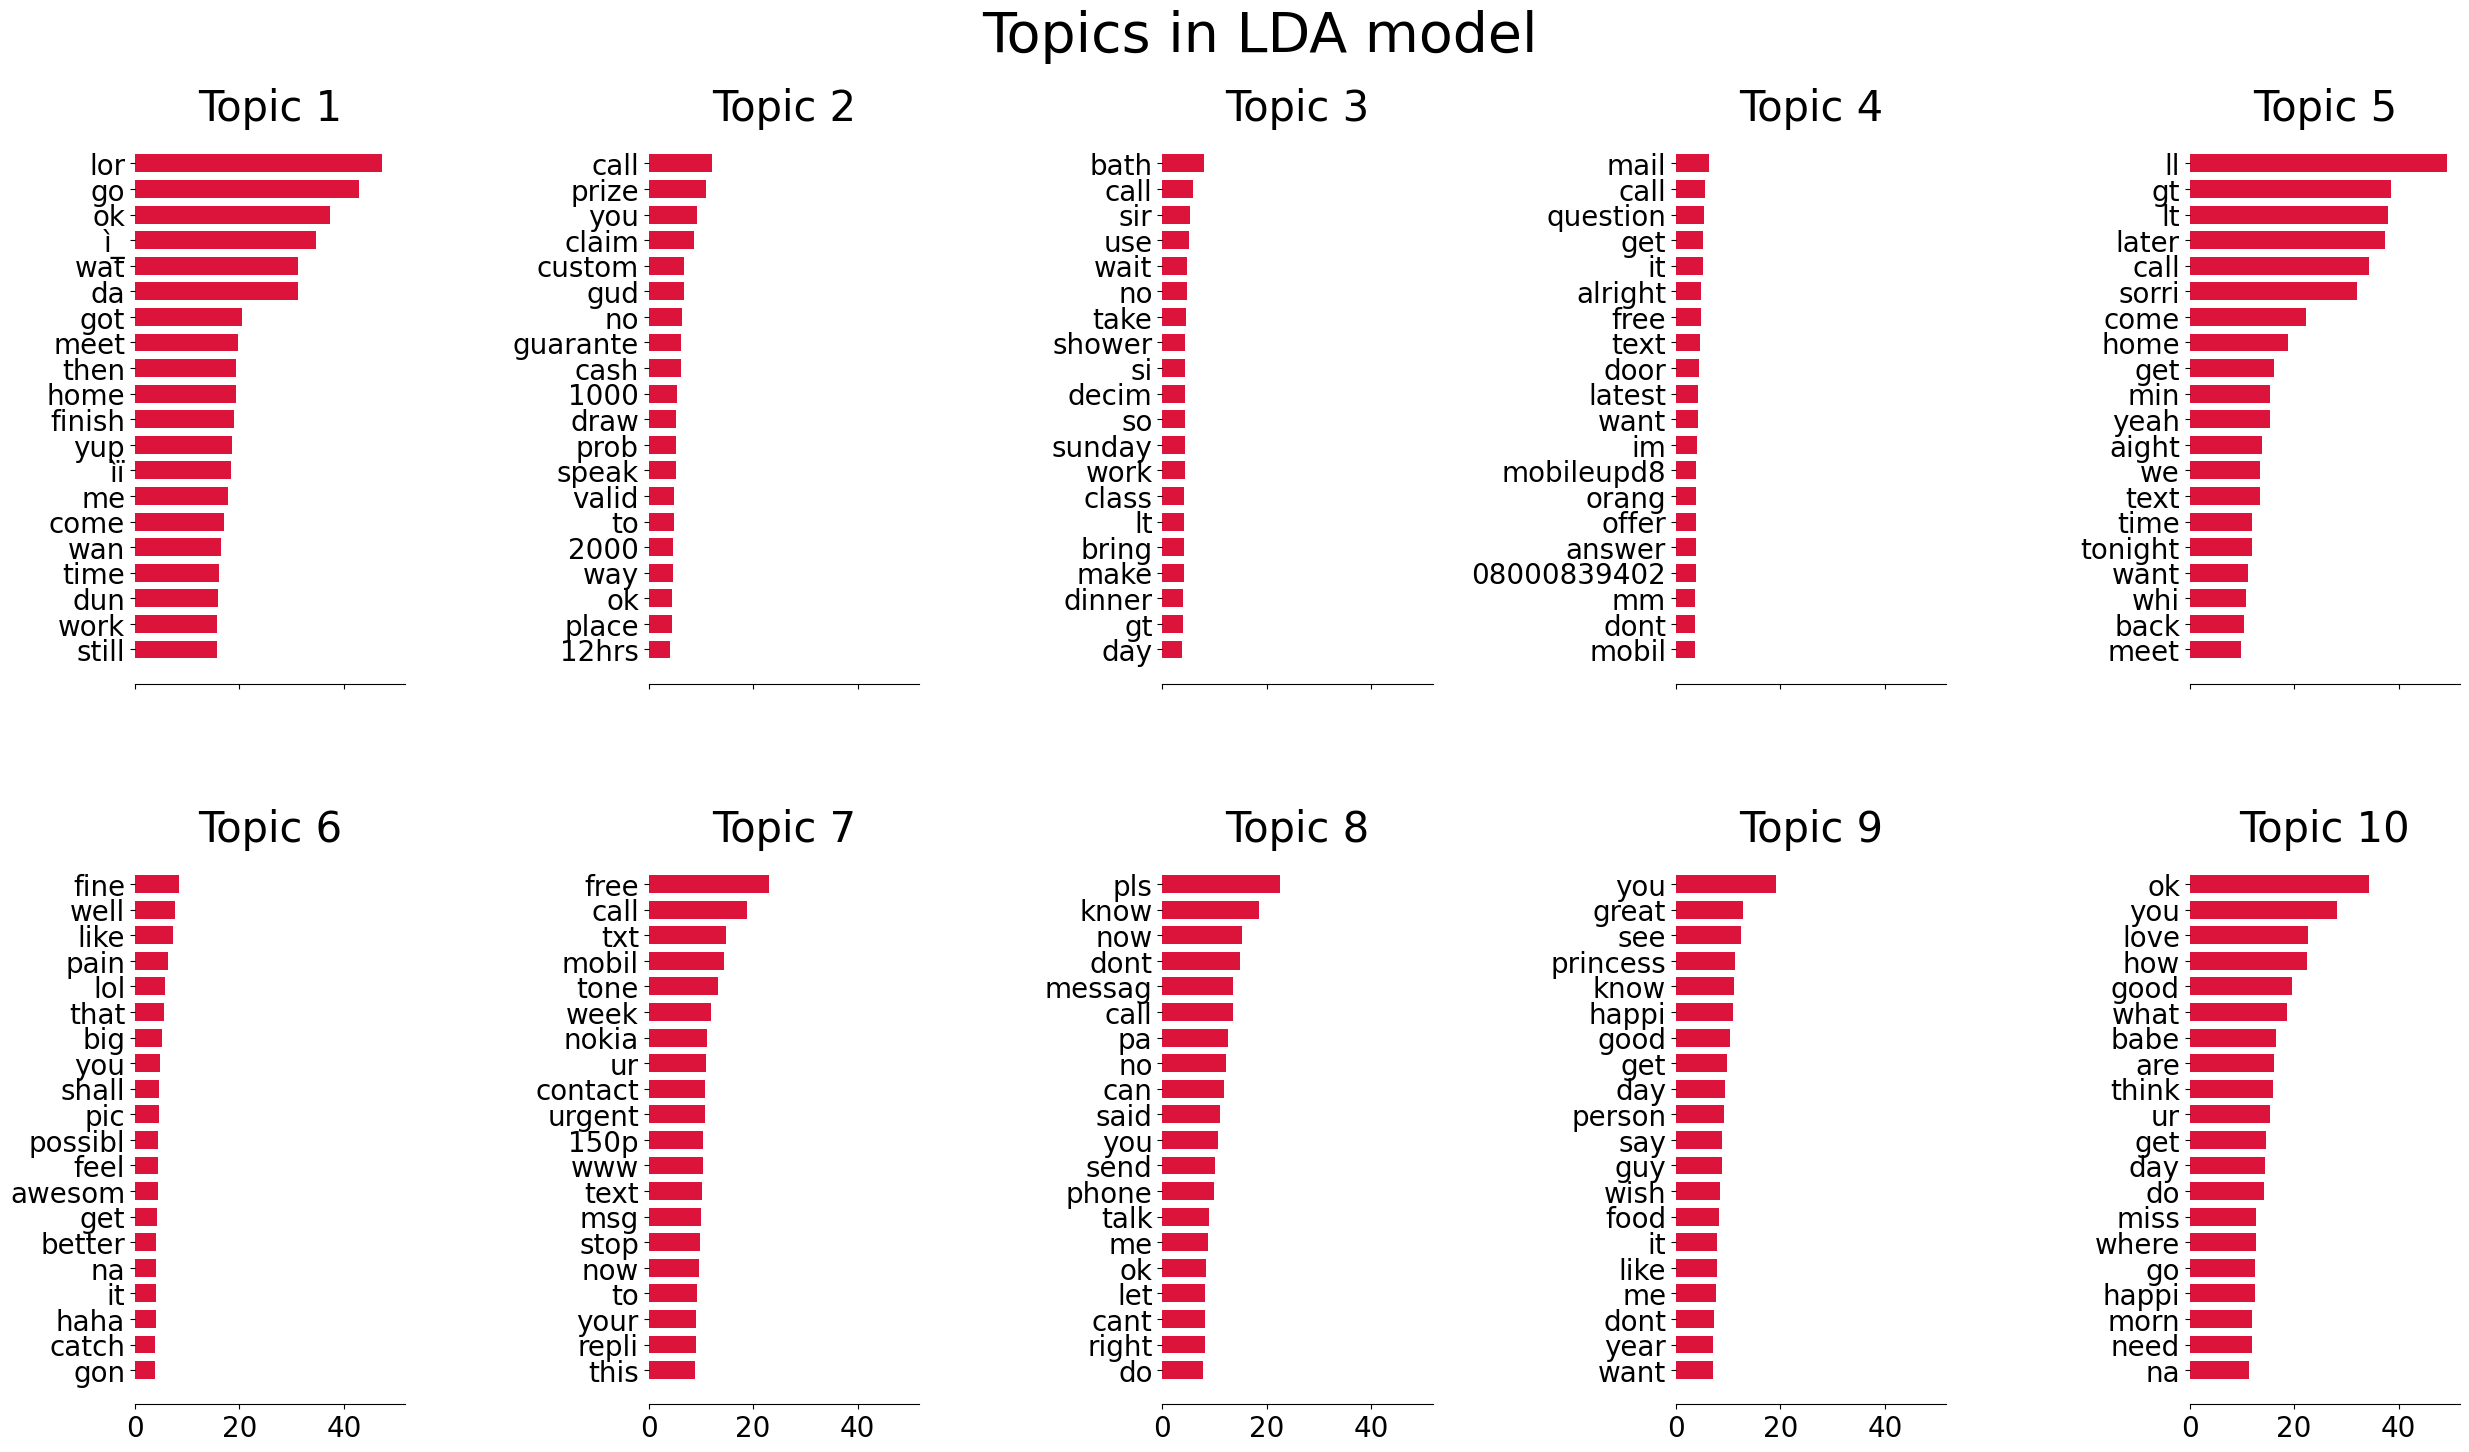

In [177]:
n_top_words = 20 #The number of top words to display

def plot_top_words(model, feature_names, n_top_words, title): #creating a function to display the 10 topics
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True) #creating 10 subplots to display each topic
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_): #for-loop for displaying multiple subplots
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1] #sorting each topic by most popular words
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7, color='crimson') #creating the horizontal bar chart for each topic
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30}) #setting title for each subplot
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40) #main title of the graph

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
tf_feature_names = v.get_feature_names_out() #getting the name of each feature in the topic
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

#Code adapted from:https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html

### Visualizing Each Topic by Total Weightage

I'll be visualizing each topic by its total weightage. I'll use a horizontal bar chart to do this.



Text(0.5, 1.0, 'Number of Documents by Topic Weightage')

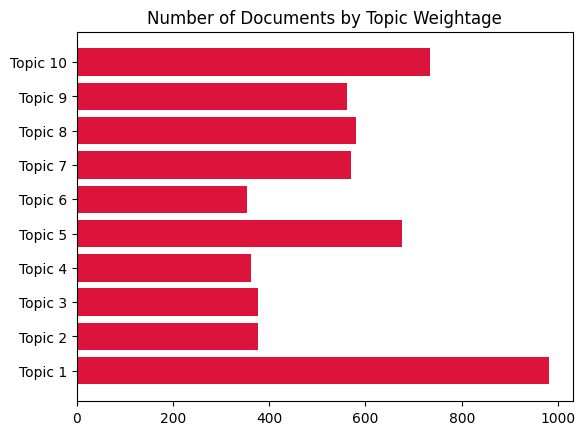

In [178]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots() #creating subplots for each topic
plt.barh(np.arange(10), np.sum(X_topics, axis=0)[0:10], color= 'crimson') #horizontal bar chart
ax.set_yticks(np.arange(10)) #Arranging 10 topics to be listed in descending order
t1=['Topic 1','Topic 2','Topic 3','Topic 4','Topic 5','Topic 6','Topic 7','Topic 8','Topic 9','Topic 10']
ax.set_yticklabels(i for i in t1) #setting the yticklabels in t1 for each bar
plt.title("Number of Documents by Topic Weightage")


Topic 7 seems to have the highest number of documents

## Top 50 Ham and Spam Words

I will display the top 50 Ham and Spam words

<Figure size 640x480 with 0 Axes>

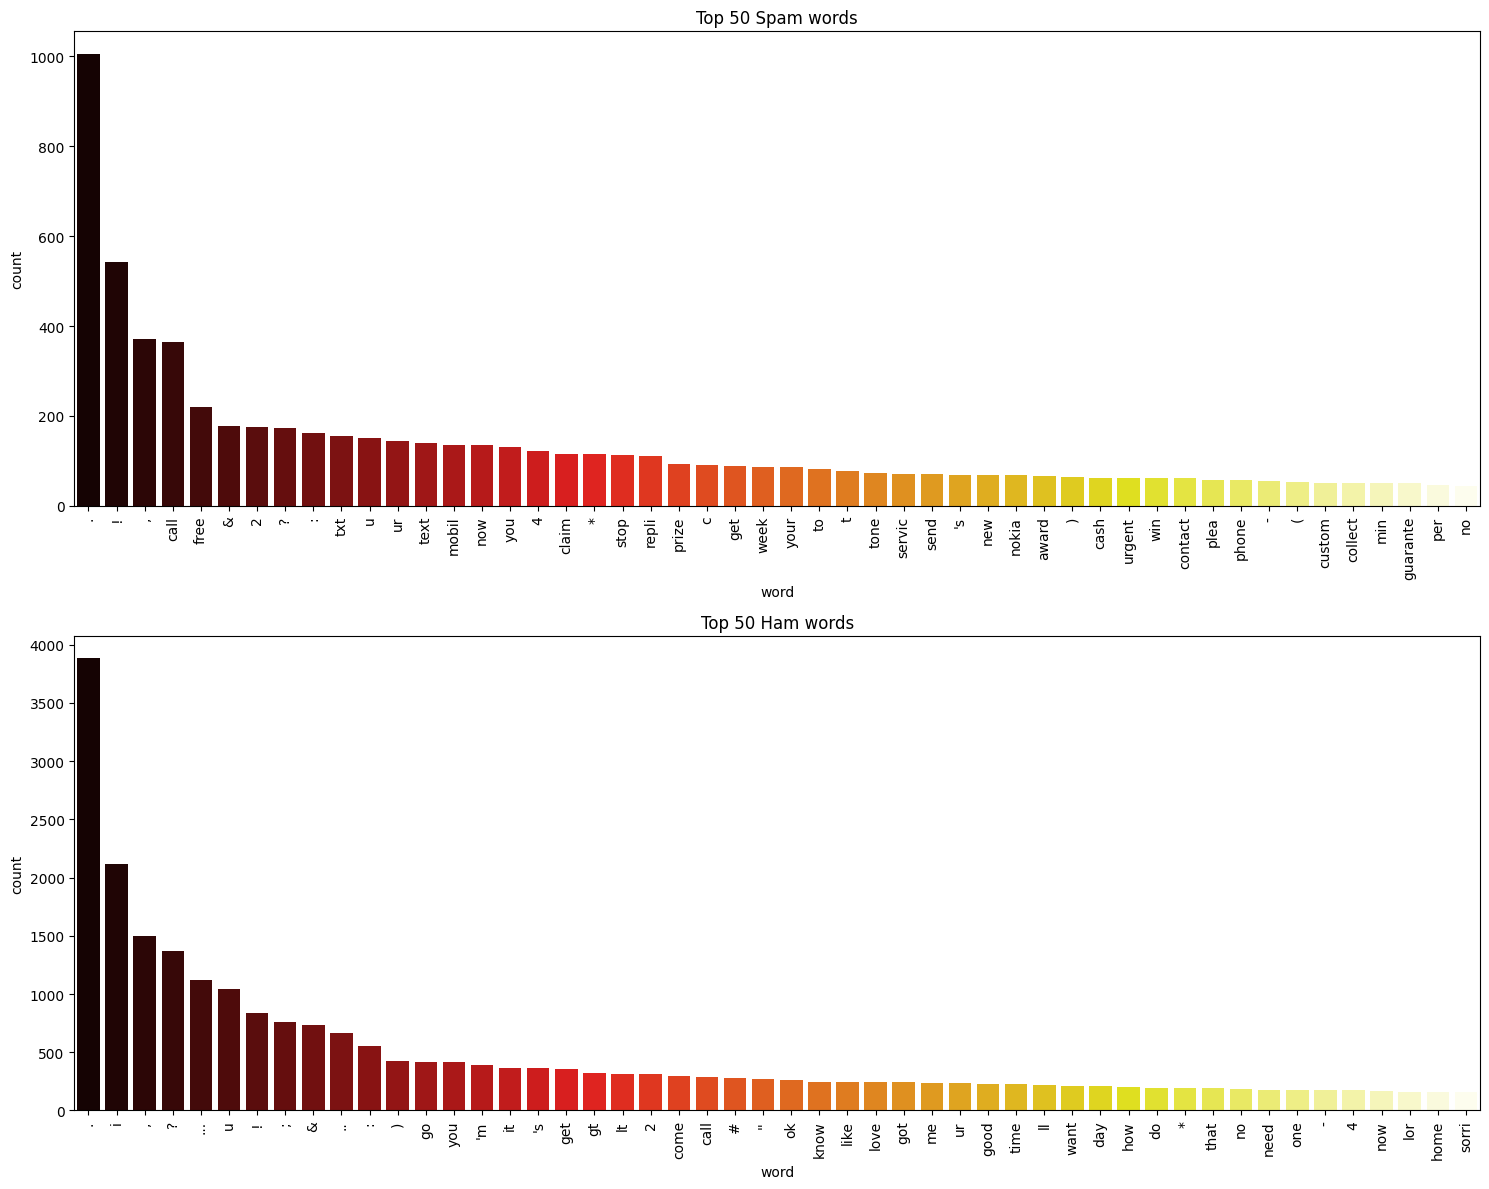

In [179]:
data_ham  = df[df['spam'] == 0].copy()
data_spam = df[df['spam'] == 1].copy()

from collections import Counter


words_data_ham = data_ham['lemmatized'].tolist() #converting 'lemmatized' ham data to array
words_data_spam = data_spam['lemmatized'].tolist() #converting 'lemmatized' spam data to array

list_ham_words = [] #creating a list to add ham words
for sublist in words_data_ham:
    for item in sublist:
        list_ham_words.append(item)

list_spam_words = [] #creating a list to add spam words
for sublist in words_data_spam:
    for item in sublist:
        list_spam_words.append(item)

c_ham  = Counter(list_ham_words) #iterating through list_ham_words
c_spam = Counter(list_spam_words) #iterating through list_spam_words
df_hamwords_top50  = pd.DataFrame(c_ham.most_common(50),  columns=['word', 'count']) #df of most common ham words in c_ham
df_spamwords_top50 = pd.DataFrame(c_spam.most_common(50), columns=['word', 'count']) #df of most common spam words in c_spam

plt.subplots_adjust(hspace=1.5)
plt.figure(figsize = (15,12))

plt.subplot(2,1,1) #creating subplot for top 50 spam words
sns.barplot(x='word', y='count',
            data=df_spamwords_top50, palette='hot')
plt.title("Top 50 Spam words")
plt.xticks(rotation='vertical');

plt.subplot(2,1,2) #creating subplot for top 50 ham words
sns.barplot(x='word', y='count',
            data=df_hamwords_top50,  palette='hot')
plt.title("Top 50 Ham words")
plt.xticks(rotation='vertical');

plt.tight_layout()
plt.show()

# Split Data

I'll be using train_test_split to split the vectorized data into 2 parts:
- training data (x_train)
- testing data (x_test)

For the labels i'll use the df['spam] labels. I'll split this data into two parts:
- training labels (y_train)
- testing labels (y_test)


In [180]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, df["spam"], random_state=42)

# Fit & Predict

To fit my data I will use a Pipeline. The Pipeline will consist of:
- Scaling the data using StandardScaler().
- Applying SMOTE() to the data
- Fitting the data using KNeighborsClassifier().

- SMOTE is an oversampling techniques for solving imbalaced classification problems. Because the target variable is imbalanced, I will be using SMOTE().
- I'll be using imblearn.pipeline instead of sklearn.pipeline. This is because the imblearn.pipeline is more suitable for working with SMOTE() oversampling, unlike sklearn.pipeline.

In [181]:
#installing and importing the necessary packages
!pip install SMOTE
! pip install imblearn
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline

I create a pipeline with StandardScaler(), SMOTE() and KNeighborsClassifier(). I then print the Test and training scores.

In [182]:
pipe = Pipeline([("scaler", StandardScaler(with_mean=False)),("sm",SMOTE(random_state=42)),("kn", KNeighborsClassifier())])
pipe.fit(x_train,y_train) #fitting the pipeline to the training data
print("Test score: ",(pipe.score(x_test, y_test)))
print("Train score: ",(pipe.score(x_train, y_train)))
#Code adapted from: https://stackoverflow.com/a/52009055/21417138

Test score:  0.9418521177315147
Train score:  0.9976070830342187


- The test and training scores are both high, suggesting that the model is generalizing well.
- However, the training score is slightly higher than the test score, suggesting slight overfitting



# Model Evaluation

## Confusion Matrix

The confusion matrix gives us more insight than just using the accuracy score. The confusion matrix shows us the proportion of correct or incorrect classifications as follows:

The number of True Positive (TP)
The number of False Positive (FP)
The number of False Negatives (FN)
The number of True Negatives (TN)
In the context of this problem:

- TP are the number of spam correctly classified as spam.
- FP are the number of ham messages incorrectly classified as spam.
- FN are the number of spam messages incorrectly classified as ham.
- TN are the number of ham messages correctly predicted as ham.

array([[3620,    3],
       [   7,  549]])

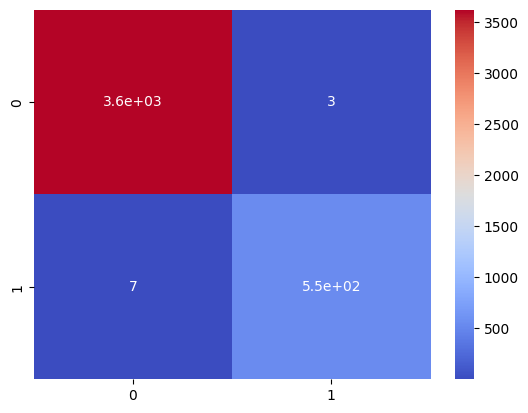

In [183]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_train,pipe.predict(x_train)) #using the actual and predicted train values
sns.heatmap(cm, annot=True, cmap="coolwarm")
cm

There are:
- 3620 True Positives
- 3 False Positives
- 7 False Negatives
- 549 True Negatives

## Classification Report

The classification report is uses the results of the confusion matrix.
- Precision is the ratio of the number of samples actually belonging to the positive class and all the samples that were predicted to be of the positive class.
- Recall is the ratio of the number of samples predicted correctly to be belonging to the positive class and all the samples that actually belong to the positive class.
- f1 Score is the harmonic mean of the recall and precision scores from the positive class. The f1-score takes into account both the precision and recall, and a high f1-score (closer to 1) implies that both the precision and recall are high.

In [184]:
from sklearn import metrics
cr= metrics.classification_report(y_train,pipe.predict(x_train))
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3623
           1       0.99      0.99      0.99       556

    accuracy                           1.00      4179
   macro avg       1.00      0.99      0.99      4179
weighted avg       1.00      1.00      1.00      4179



The f1-score takes into account both the precision and recall, and a high f1-score (closer to 1) implies that both the precision and recall are high. In this case, we can see that the f1-score at 0.99 is quite high and this is shown by the precision at 0.99 being quite high and the recall at 0.99 being quite high. An f1-score of 0.99 means that the model is likely generalizing well.

## Visualizing the Accuracy

I'll visualize the accuracy using the ROC curve. The ROC curve measures the accuracy of the predictions. It is associated with the AUC metric. The AUC metric is measured between 0 and 1. The closer the AUC metric is to 1, the more accurate the model is.

Text(0.5, 1.0, 'ROC Curve for KNN')

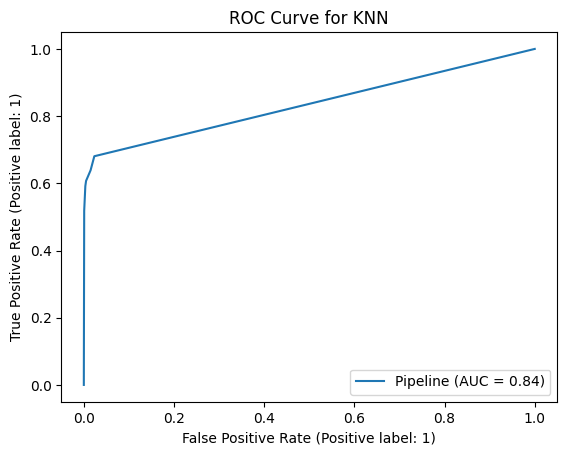

In [185]:
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(pipe,x_test,y_test)
plt.title("ROC Curve for KNN")

- The AUC Score of 0.84 is close to 1 and this suggests that the model is quite accurate, although there is room for improvement.

# Cross Validation

I will be checking the generalization of the models using Cross-validation.

Cross-validation is a method for checking the generalization of a machine learning model. Cross-validation involves splitting the data repeatedly and training multiple models. The benefits of using cross-validation is that having multiple splits of the data provides a more thorough evaluation of the model.

Depending on the number of folds, we can get a certain number of cross-validation scores. To get the total cross-validation score, we take the average.

In [186]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, x, df["spam"],scoring='accuracy').mean()

0.9353894582605407

From this score, it can be confirmed that the model is well generalized.

# Hyperparameter Tuning

Hyperparameter tuning helps improve generalization. It helps find the best parameters for the model.

In [187]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'kn__n_neighbors': [2,5,15, 30, 45, 64]
}

grid = GridSearchCV(pipe, param_grid, scoring='accuracy')

grid.fit(x_train, y_train)

print("Best Params:",grid.best_params_)
print("Best Score:",grid.best_score_)

Best Params: {'kn__n_neighbors': 2}
Best Score: 0.9308429074864625


The best parameters are shown to be k=2